# Gesture Recognition

1. Build a 3D CNN model that will be able to predict the 5 gestures correctly. 
2. Build CNN and RNN model that will be able to predict the 5 gestures correctly.

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import datetime
import os
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)

Using TensorFlow backend.


In this block, you read the folder names for training and validation. 

In [3]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())

## Pre-Processing Images

In [4]:
# Function to randomly generate list of trainning data with minimum imbalance

def train_data(train_doc):
    t=[]
    
    train_data = [i.split(';') for i in train_doc]
    train_df = pd.DataFrame(train_data, columns = ['Folder Name', 'Action', 'Encoding'])  
    train_df['Full_name']= [i for i in train_doc]       
    train_df.Encoding = train_df.Encoding.str.replace('\n', '')

    folder_list_0=np.random.permutation(train_df[train_df.Encoding=='0']['Full_name'].values.tolist())
    folder_list_1=np.random.permutation(train_df[train_df.Encoding=='1']['Full_name'].values.tolist())
    folder_list_2=np.random.permutation(train_df[train_df.Encoding=='2']['Full_name'].values.tolist())
    folder_list_3=np.random.permutation(train_df[train_df.Encoding=='3']['Full_name'].values.tolist())
    folder_list_4=np.random.permutation(train_df[train_df.Encoding=='4']['Full_name'].values.tolist())
    
    for i in range(len(train_doc)):
        if i<len(folder_list_0):
            t.append(folder_list_0[i])
        if i<len(folder_list_1):
            t.append(folder_list_1[i])
        if i<len(folder_list_2):
            t.append(folder_list_2[i])
        if i<len(folder_list_3):
            t.append(folder_list_3[i])
        if i<len(folder_list_4):
            t.append(folder_list_4[i])
    
    return t

In [5]:
# Function to randomly generate list of validation data with minimum imbalance
def val_data(val_doc):
    t=[]
    
    val_data = [i.split(';') for i in val_doc]
    val_df = pd.DataFrame(val_data, columns = ['Folder Name', 'Action', 'Encoding'])  
    val_df['Full_name']= [i for i in val_doc]       
    val_df.Encoding = val_df.Encoding.str.replace('\n', '')

    folder_list_0=np.random.permutation(val_df[val_df.Encoding=='0']['Full_name'].values.tolist())
    folder_list_1=np.random.permutation(val_df[val_df.Encoding=='1']['Full_name'].values.tolist())
    folder_list_2=np.random.permutation(val_df[val_df.Encoding=='2']['Full_name'].values.tolist())
    folder_list_3=np.random.permutation(val_df[val_df.Encoding=='3']['Full_name'].values.tolist())
    folder_list_4=np.random.permutation(val_df[val_df.Encoding=='4']['Full_name'].values.tolist())
    
    for i in range(len(train_doc)):
        if i<len(folder_list_0):
            t.append(folder_list_0[i])
        if i<len(folder_list_1):
            t.append(folder_list_1[i])
        if i<len(folder_list_2):
            t.append(folder_list_2[i])
        if i<len(folder_list_3):
            t.append(folder_list_3[i])
        if i<len(folder_list_4):
            t.append(folder_list_4[i])
    
    return t


Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00033.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00045.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00055.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00025.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00063.png


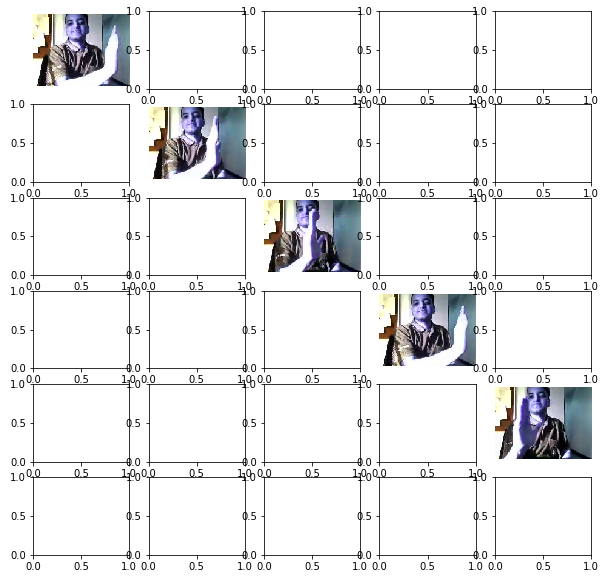

In [6]:
# View the right swipe Images
train_data_list = [i.split(';') for i in train_doc]
train_df = pd.DataFrame(train_data_list, columns = ['Folder Name', 'Action', 'Encoding'])  
train_df.Encoding = train_df.Encoding.str.replace('\n', '')
img_folder_names = train_df.loc[train_df.Encoding=='1','Folder Name'].reset_index(drop=True)

path = 'Project_data/train/'+ img_folder_names[9] 
imgs = os.listdir(path)


fig, axes = plt.subplots(6, 5, figsize=(10, 10))
ax = axes.ravel()

for i in range(0,30,6):
    train_path = path + '/' + imgs[i]
    print(train_path)
    image = cv2.imread(train_path) 
    
    ax[i].imshow(image)
    ax[i].axis('off')
    
plt.show()

Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00033.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00045.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00055.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00025.png
Project_data/train/WIN_20180926_17_23_23_Pro_Right_Swipe_new/WIN_20180926_17_23_23_Pro_00063.png


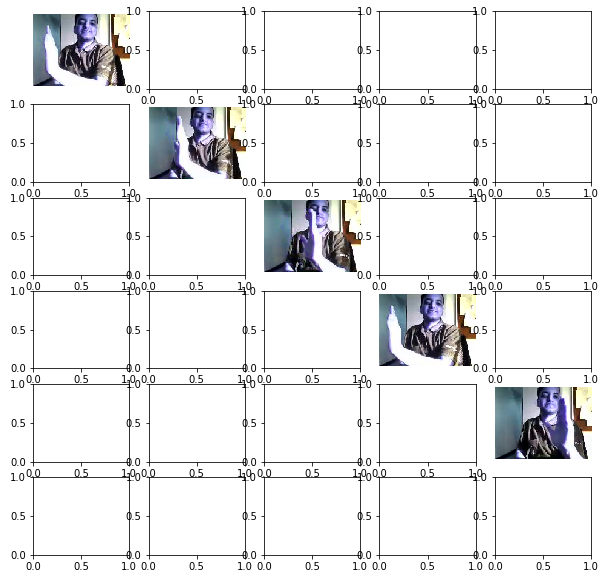

In [7]:
# View the right swipe Images when flipped to get left swipe
img_folder_names = train_df.loc[train_df.Encoding=='1','Folder Name'].reset_index(drop=True)

path = 'Project_data/train/'+ img_folder_names[9] 
imgs = os.listdir(path)


fig, axes = plt.subplots(6, 5, figsize=(10, 10))
ax = axes.ravel()

for i in range(0,30,6):
    train_path = path + '/' + imgs[i]
    print(train_path)
    image = cv2.imread(train_path)
    image = cv2.flip(image, 1)
    
    ax[i].imshow(image)
    ax[i].axis('off')
    
plt.show()

### Define a function to augment flipped images along with labels

In [8]:
# 0-left, 1-right, 2-stop, 3-thumbsDown, 4-thumbsUp
# flip the images and reverse the order and change labels accordingly to generate more data
def augment_image(image, batch_label):
    if batch_label==0:
        image = cv2.flip(image, 1)
        return image,1
    if batch_label==1:
        image = cv2.flip(image, 1)
        return image,0
    if batch_label==2:
        image = cv2.flip(image, 1)
        return image,2
    if batch_label==3:
        image = cv2.flip(image, 1)
        return image,3
    if batch_label==4:
        image = cv2.flip(image, 1)
        return image,4
    

Set `batch_size` , `No of classes to classify` , `No of frames of each video to use`, `size of image to be fed to model`

Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [31]:
# define image parameters to be used 

batch_size= 15 # training after augmentation will be double i.e. 40
val_batch_size = batch_size*2
num_classes=5
img_idx = range(0,30) # all frames to be used
x=len(img_idx)
y=120
z=120

### Define a function to transform images masking by the skin colour to remove the background noise. 

(120, 120, 3)
(120, 120, 3)
(120, 120, 3)


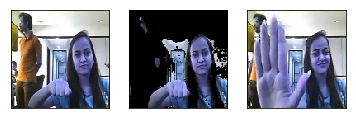

In [11]:
# define a function to transform image and remove background
def transform_image(image):
    # min_YCrCb = np.array([0,133,77],np.uint8)
    # max_YCrCb = np.array([235,173,127],np.uint8)

    # imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
    # skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
    # skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)
    
    resized = cv2.resize(image, (y,z), interpolation = cv2.INTER_AREA)
    
    #img_bgr = cv2.cvtColor(resized,cv2.COLOR_YCR_CB2BGR)
    
    normalised = resized/255
    
    return normalised

path = 'Project_data/train/'+ str(train_doc[10]).split(';')[0] 
imgs = os.listdir(path)

img1path = path + '/' + imgs[1]
img2path = path + '/' + imgs[20]
img3path = path + '/' + imgs[29]

img_1= cv2.imread(img1path)
img_2= cv2.imread(img2path)
img_3= cv2.imread(img3path)


img1 = transform_image(img_1)

# background removal for one image to see how it looks
min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)
imageYCrCb = cv2.cvtColor(img_2,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
skinYCrCb = cv2.bitwise_and(img_2, img_2, mask = skinRegionYCrCb)
img2 = transform_image(skinYCrCb)

img3 = transform_image(img_3) 

images = [img1, img2, img3]

for i in range(3):
    print(images[i].shape)
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Using skin detection and removing background doesn't help in improvement of accuracy. Hence will just resize and normalise the images.

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [39]:
def train_generator(source_path, folder_list, batch_size, experiment=0):
    
    new_batch_size= batch_size*2 #due to augmentation
    
    print( 'Source path = ', source_path, '; Train batch size =', new_batch_size)
    
    if experiment!=0:
        folder_list=folder_list[:experiment]
        
    while True:
        
        t= train_data(folder_list) # generate randomly trainlist with minimum imbalance 
        num_batches = int(len(folder_list)/batch_size)
        for batch in range(num_batches): # iterate over the number of batches
            batch_data = np.zeros((new_batch_size,x,y,z,3)) # x is the number of images of each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((new_batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                batch_label=int(t[folder + (batch*batch_size)].strip().split(';')[2])
                
                
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #call function to transform image removing background noise
                    image = transform_image(image)
                    
                    batch_data[folder,idx,:,:,0] = image[:, : , 0]
                    batch_data[folder,idx,:,:,1] = image[:, : , 1]
                    batch_data[folder,idx,:,:,2] = image[:, : , 2]
                    
                batch_labels[folder, batch_label] = 1
                
                # to get augmented frames
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #call function to transform image removing background noise
                    image = transform_image(image)
                    # call function to create augmented flipped image with changed label
                    image, batch_label = augment_image(image,batch_label)
                    
                    batch_data[folder+batch_size,idx,:,:,0] = image[:, : , 0]
                    batch_data[folder+batch_size,idx,:,:,1] = image[:, : , 1]
                    batch_data[folder+batch_size,idx,:,:,2] = image[:, : , 2]
                    
                batch_labels[folder+batch_size, batch_label] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches, don't augment the last batch
        last_batch_size=len(folder_list)-(batch_size*num_batches)
        if last_batch_size>0:
            batch_data = np.zeros((last_batch_size,x,y,z,3)) 
            batch_labels = np.zeros((last_batch_size,5)) 
            for lfolder in range(last_batch_size): # iterate over the last_batch_size
                limgs = os.listdir(source_path+'/'+ t[lfolder + (batch_size*num_batches)].split(';')[0]) # read all the images in the folders of last batch
                for lidx,litem in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    limage = cv2.imread(source_path+'/'+ t[lfolder + (batch_size*num_batches)].strip().split(';')[0]+'/'+limgs[litem]).astype(np.float32)
                                        
                    limage = transform_image(limage) 

                    batch_data[lfolder,lidx,:,:,0] = limage[:, : , 0]
                    batch_data[lfolder,lidx,:,:,1] = limage[:, : , 1]
                    batch_data[lfolder,lidx,:,:,2] = limage[:, : , 2]

                batch_labels[lfolder, int(t[lfolder + (batch_size*num_batches)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels

In [40]:
def val_generator(source_path, folder_list, batch_size, experiment=0):
    
    print( 'Source path = ', source_path, '; Validation batch size =', batch_size)
    
    if experiment!=0:
        folder_list=folder_list[:experiment]
        
    while True:
        t = val_data(folder_list)
        num_batches = int(len(folder_list)/batch_size)
        for batch in range(num_batches): # iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images of each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                batch_label=int(t[folder + (batch*batch_size)].strip().split(';')[2])
                
                
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #call function to transform image removing background noise
                    image = transform_image(image)
                    
                    batch_data[folder,idx,:,:,0] = image[:, : , 0]
                    batch_data[folder,idx,:,:,1] = image[:, : , 1]
                    batch_data[folder,idx,:,:,2] = image[:, : , 2]
                    
                batch_labels[folder, batch_label] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches, don't augment the last batch
        last_batch_size=len(folder_list)-(batch_size*num_batches)
        if last_batch_size>0:
            batch_data = np.zeros((last_batch_size,x,y,z,3)) 
            batch_labels = np.zeros((last_batch_size,5)) 
            for lfolder in range(last_batch_size): # iterate over the last_batch_size
                limgs = os.listdir(source_path+'/'+ t[lfolder + (batch_size*num_batches)].split(';')[0]) # read all the images in the folders of last batch
                for lidx,litem in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    limage = cv2.imread(source_path+'/'+ t[lfolder + (batch_size*num_batches)].strip().split(';')[0]+'/'+limgs[litem]).astype(np.float32)
                                        
                    limage = transform_image(limage) 

                    batch_data[lfolder,lidx,:,:,0] = limage[:, : , 0]
                    batch_data[lfolder,lidx,:,:,1] = limage[:, : , 1]
                    batch_data[lfolder,lidx,:,:,2] = limage[:, : , 2]

                batch_labels[lfolder, int(t[lfolder + (batch_size*num_batches)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [14]:
# if not experiment use experiment=0
experiment=0

if experiment!=0 and batch_size>experiment:
    batch_size=experiment

curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'

if experiment!=0:
    num_train_sequences = len(train_doc[:experiment])
    print('# training sequences =', num_train_sequences)
    num_val_sequences = len(val_doc[:experiment])
    print('# validation sequences =', num_val_sequences)
else:
    num_train_sequences = len(train_doc)
    print('# training sequences =', num_train_sequences)
    num_val_sequences = len(val_doc)
    print('# validation sequences =', num_val_sequences)
    
num_epochs = 30
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


## Model 3D CNN

Using `Conv3D` and `MaxPooling3D` for a 3D convolution model. The last layer is the softmax. 
Design the network in such a way that the model is able to give good accuracy on the least number of parameters.

In [15]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Dropout, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2

### Conv3D model
# input size (batch_size=20, x=15, y=100, z=100, channel=3)

model = Sequential()
# 1st layer
model.add(Conv3D(8, (3, 3, 3), activation="relu",name="conv1", 
                     input_shape=(x,y,z,3),
                     data_format="channels_last",
                     padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2), name="pool1"))

# 2nd layer
model.add(Conv3D(16, (3, 3, 3), activation="relu",name="conv2",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2), name="pool2"))


# 3rd layer
model.add(Conv3D(32, (1, 3, 3), activation="relu",name="conv3", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=(2, 2, 2), name="pool3"))


# 4th layer
model.add(Conv3D(64, (1, 3, 3), activation="relu",name="conv4", padding="same",))
model.add(Dropout(0.25))
model.add(MaxPooling3D(pool_size=(2, 2, 2), name="pool4"))


# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax', name='output'))

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [16]:
optimiser = 'adam'
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 30, 120, 120, 8)   656       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 120, 120, 8)   32        
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 15, 60, 60, 8)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 15, 60, 60, 16)    3472      
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 60, 60, 16)    64        
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 7, 30, 30, 16)     0         
_________________________________________________________________
conv3 (Conv3D)               (None, 7, 30, 30, 32)     4640      
__________

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [107]:
train_generator = train_generator(train_path, train_doc, batch_size)
val_generator = val_generator(val_path, val_doc, val_batch_size)

In [108]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, verbose=1, patience=2, cooldown=1)
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [50]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [100]:
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; Validation batch size = Source path =  Project_data/train ; Train batch size = 40
Epoch 1/30
40
34/34 [==============================] - 229s 7s/step - loss: 2.2018 - categorical_accuracy: 0.2678 - val_loss: 1.3571 - val_categorical_accuracy: 0.3778

Epoch 00001: saving model to model_init_2020-04-1218_48_15.312151/model-00001-2.22813-0.26606-1.35715-0.37778.h5
Epoch 2/30
34/34 [==============================] - 89s 3s/step - loss: 1.3852 - categorical_accuracy: 0.3525 - val_loss: 1.4766 - val_categorical_accuracy: 0.2687

Epoch 00002: saving model to model_init_2020-04-1218_48_15.312151/model-00002-1.38840-0.36206-1.47655-0.26875.h5
Epoch 3/30
34/34 [==============================] - 90s 3s/step - loss: 1.2841 - categorical_accuracy: 0.4275 - val_loss: 1.2428 - val_categorical_accuracy: 0.3750

Epoch 00003: saving model to model_init_2020-04-1218_48_15.312151/model-00003-1.28471-0.42101-1.24281-0.37500.h5
Epoch 4/30
34/34 [============================

34/34 [==============================] - 92s 3s/step - loss: 0.2013 - categorical_accuracy: 0.9316 - val_loss: 0.4478 - val_categorical_accuracy: 0.8375

Epoch 00029: saving model to model_init_2020-04-1218_48_15.312151/model-00029-0.20651-0.92971-0.44776-0.83750.h5
Epoch 30/30
34/34 [==============================] - 91s 3s/step - loss: 0.2019 - categorical_accuracy: 0.9323 - val_loss: 0.4902 - val_categorical_accuracy: 0.8375

Epoch 00030: saving model to model_init_2020-04-1218_48_15.312151/model-00030-0.20585-0.93046-0.49023-0.83750.h5


In [102]:
# copy the best model .h5 to other directory
models = os.listdir('model_init_2020-04-1218_48_15.312151')
model_data = [i.split('h5')[0].split('-') for i in models]
model_df = pd.DataFrame(model_data, columns = ['model', 'nbr', 'train_loss','train_accuracy','val_loss','val_accuracy'])  
model_df['full_model_name'] = [i for i in models]
sorted_by_val = model_df.sort_values(by=['val_accuracy'], ascending=False)
print(sorted_by_val.head())
m = sorted_by_val['full_model_name'].values.tolist()[0]

src = 'model_init_2020-04-1218_48_15.312151/'+ m
dst = 'best_models/'+ m
from shutil import copyfile
copyfile(src, dst)


    model    nbr train_loss train_accuracy val_loss val_accuracy  \
24  model  00030    0.20585        0.93046  0.49023     0.83750.   
9   model  00029    0.20651        0.92971  0.44776     0.83750.   
13  model  00023    0.23447        0.91610  0.52277     0.83125.   
15  model  00027    0.21849        0.92668  0.46801     0.82500.   
20  model  00015    0.38767        0.84505  0.64016     0.81875.   

                                   full_model_name  
24  model-00030-0.20585-0.93046-0.49023-0.83750.h5  
9   model-00029-0.20651-0.92971-0.44776-0.83750.h5  
13  model-00023-0.23447-0.91610-0.52277-0.83125.h5  
15  model-00027-0.21849-0.92668-0.46801-0.82500.h5  
20  model-00015-0.38767-0.84505-0.64016-0.81875.h5  


'best_models/model-00030-0.20585-0.93046-0.49023-0.83750.h5'

# Model CNN+RNN

1. Build a Conv2D model using pre-trained Resnet-50.
2. Feed the `TimeDistributed` while building a Conv2D to GRU model.
3. Softmax output of the GRU model.

In [24]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, GRU, Flatten, TimeDistributed, Dropout, BatchNormalization, Activation, Reshape, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

##### 2D-CNN and RNN model
# input size (batch_size=20, x=15, y=120, z=120, channel=3)

# input layer
input_tensor = Input(shape=(x, y, z, 3))

# Get pre-trained model: vgg16 
vgg_layers = VGG16(weights='imagenet', include_top=False)
    # freeze the layers in base model
for layer in vgg_layers.layers:
    layer.trainable = False
    # create a VGG model selecting all layers   
vgg_model = Model(inputs=vgg_layers.input, outputs=vgg_layers.output)


# Adding Time Distributed wrapper on top of resnet model and passing the input tensor
time_distributed_layer= TimeDistributed(vgg_model)(input_tensor)

# Average pooling layer
avg_pool_layer= TimeDistributed(GlobalAveragePooling2D())(time_distributed_layer)

# Flatten before connecting to GRU
flatten_layer = TimeDistributed(Flatten())(avg_pool_layer)
flatten_dropped_out=Dropout(0.5)(flatten_layer)

# reshape the output of time distributed layer to be fed into LSTM or GRU
#tensor_size=np.prod(time_distributed_layer.get_shape().as_list()[2:]) 
#reshape_layer = Reshape(target_shape=(x,tensor_size))(time_distributed_layer)
         
# GRU layer
gru_out = GRU(128, return_sequences=False, dropout=0.5)(flatten_dropped_out)

# Fully connected Dense Layer
#fc_out = Dense(256, activation="relu")(gru_out)
#fc_dropped_out=Dropout(0.5)(fc_out)
#bn_layer=BatchNormalization()(fc_dropped_out)

# Output layer
output = Dense(num_classes, activation='softmax')(gru_out)

# final Model
model2 = Model(inputs=input_tensor, outputs=output)

In [25]:
optimiser = 'adam'
model2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 30, 120, 120, 3)   0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 30, 3, 3, 512)     14714688  
_________________________________________________________________
time_distributed_12 (TimeDis (None, 30, 512)           0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 30, 512)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 512)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               246144    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total para

In [41]:
# if not experiment use experiment=0
experiment=0

if experiment!=0 and batch_size>experiment:
    batch_size=experiment

curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'

if experiment!=0:
    num_train_sequences = len(train_doc[:experiment])
    print('# training sequences =', num_train_sequences)
    num_val_sequences = len(val_doc[:experiment])
    print('# validation sequences =', num_val_sequences)
else:
    num_train_sequences = len(train_doc)
    print('# training sequences =', num_train_sequences)
    num_val_sequences = len(val_doc)
    print('# validation sequences =', num_val_sequences)
    
num_epochs = 20
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 20


In [42]:
train_generator = train_generator(train_path, train_doc, batch_size)
val_generator= val_generator(val_path, val_doc, val_batch_size)

In [43]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=2, cooldown=1)
callbacks_list = [checkpoint, LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [44]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [45]:
model2.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/val ; Validation batch size = 30
Source path =  Project_data/train ; Train batch size =Epoch 1/20 30

45/45 [==============================] - 137s 3s/step - loss: 0.8050 - categorical_accuracy: 0.6828 - val_loss: 0.8127 - val_categorical_accuracy: 0.6842

Epoch 00001: saving model to model_init_2020-04-1311_55_38.749819/model-00001-0.81430-0.67649-0.81273-0.68421.h5
Epoch 2/20
45/45 [==============================] - 133s 3s/step - loss: 0.8089 - categorical_accuracy: 0.6836 - val_loss: 0.7892 - val_categorical_accuracy: 0.7294

Epoch 00002: saving model to model_init_2020-04-1311_55_38.749819/model-00002-0.81600-0.67725-0.78917-0.72941.h5
Epoch 3/20
45/45 [==============================] - 133s 3s/step - loss: 0.8021 - categorical_accuracy: 0.6772 - val_loss: 0.8866 - val_categorical_accuracy: 0.7118

Epoch 00003: saving model to model_init_2020-04-1311_55_38.749819/model-00003-0.80131-0.68405-0.88659-0.71176.h5
Epoch 4/20
45/45 [==========================

In [89]:
# copy the best model .h5 to other directory
models = os.listdir('model_init_2020-04-1217_02_15.375055')
model_data = [i.split('h5')[0].split('-') for i in models]
model_df = pd.DataFrame(model_data, columns = ['model', 'nbr', 'train_loss','train_accuracy','val_loss','val_accuracy'])  
model_df['full_model_name'] = [i for i in models]
sorted_by_val = model_df.sort_values(by=['val_accuracy'], ascending=False)
print(sorted_by_val.head())
m = sorted_by_val['full_model_name'].values.tolist()[0]

src = 'model_init_2020-04-1217_02_15.375055/'+ m
dst = 'best_models/'+ m
from shutil import copyfile
copyfile(src, dst)

   model    nbr train_loss train_accuracy val_loss val_accuracy  \
4  model  00004    1.17923        0.87075  3.73373     0.23333.   
0  model  00006    0.80756        0.92971  3.66185     0.22500.   
1  model  00002    2.03020        0.69917  3.86945     0.22500.   
8  model  00007    0.70753        0.94482  4.00131     0.22222.   
2  model  00008    0.58690        0.96145  4.43296     0.21875.   

                                  full_model_name  
4  model-00004-1.17923-0.87075-3.73373-0.23333.h5  
0  model-00006-0.80756-0.92971-3.66185-0.22500.h5  
1  model-00002-2.03020-0.69917-3.86945-0.22500.h5  
8  model-00007-0.70753-0.94482-4.00131-0.22222.h5  
2  model-00008-0.58690-0.96145-4.43296-0.21875.h5  


'best_models/model-00004-1.17923-0.87075-3.73373-0.23333.h5'